# AIRCRAFT RISK ANALYSIS
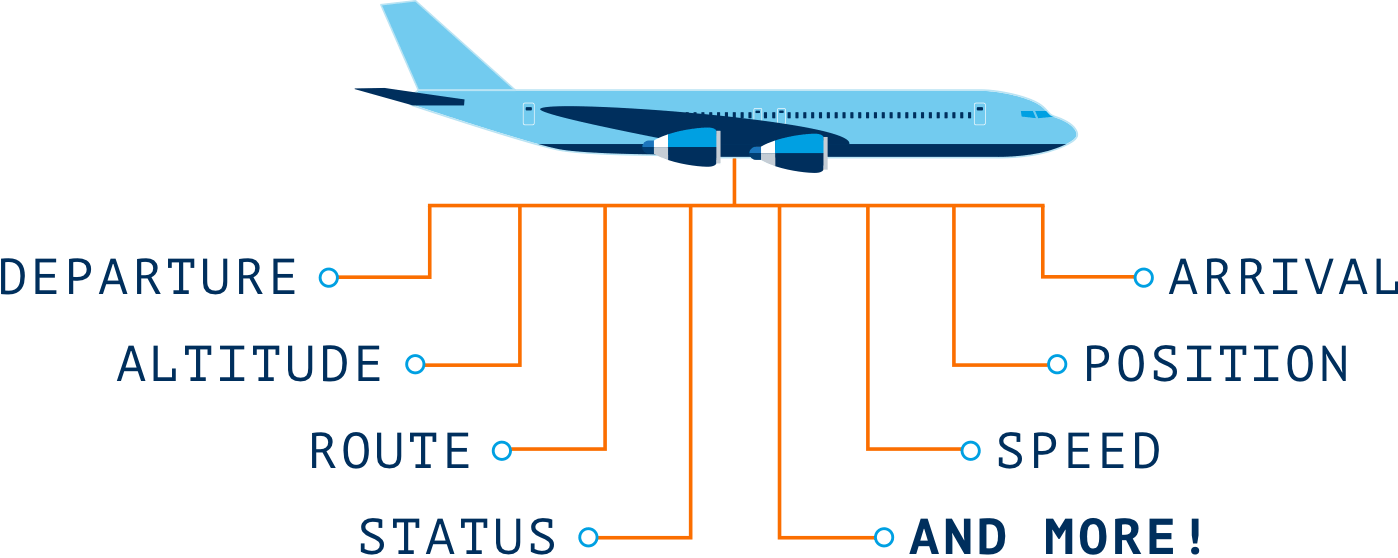

### Overview
To provide actionable insights for the company's new aviation division, we'll analyze the dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. 
Our goal is to identify aircraft with the lowest risk, guiding the company in selecting safe aircraft for their new venture. 
The process will involve data cleaning, imputation, analysis, and visualization.


### Business Problem

The company is expanding into the aviation industry and needs to determine which aircraft types are the lowest risk to purchase. This analysis will help the head of the new aviation division make informed decisions about which aircraft to acquire for commercial and private enterprises.



#### Objectives:

MAIN OBJECTIVE:
Identify aircraft models that offer the lowest risk profile for purchase and operation, aligning with the company's strategic expansion into the aviation sector.

SPECIFIC OBJECTIVES:

Determine the safety performance of different aircraft models by analyzing historical accident data.
Differentiate between aircraft suitable for commercial ventures and those more suitable for private use, based on risk assessment and operational requirements.

### Data Understanding
The dataset contains information on aviation accidents from 1962 to 2023, detailing various aspects such as aircraft type, injury severity, and accident location. Many columns have missing values and inconsistent data types, necessitating thorough cleaning and preprocessing. Key tasks include handling missing values, converting data types for accurate analysis, and extracting relevant information from categorical data. This preparation is essential for identifying low-risk aircraft and providing actionable insights for the company's new aviation division.

In [1]:
#Importing necessary libraries
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the US State dataset
US_State_df = pd.read_csv('data/USState_Codes.csv')
# Previewing the top of our dataset
US_State_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [3]:
#Loading the aviation dataset
aviation_df = pd.read_csv('data/AviationData.csv', encoding = 'ISO-8859-1', low_memory = False)
# Previewing the top and bottom of our dataset
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Data Inspection and Exploration

In [4]:
#Checking the size of the DataFrame
aviation_df.shape

(88889, 31)

In [5]:
# Checking whether each column has an appropriate datatype
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
#Getting the summary statistics of the numerical data 
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The DataFrame contains 88,889 entries with 31 columns. The data is primarily categorical, with many columns containing missing values. The Latitude and Longitude columns have a significant amount of missing data, which may impact geographic analysis. 5 columns are numeric and contain float values, the remaining 26 columns are categorical.

### Data Cleaning and handling


Identify duplicated and missing values

In [7]:
# Check for duplicated rows in the dataframe
aviation_df.duplicated().sum()


0

In [8]:
# Check for missing values
print(aviation_df.isnull().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [9]:
# Check for duplicated values in the 'Registration.Number' and 'Event.Id' columns since they should have unique values
reg_no_duplicates = aviation_df['Registration.Number'].duplicated().sum()
event_id_duplicates = aviation_df['Event.Id'].duplicated().sum()

print('reg_no_duplicates:', reg_no_duplicates)
print('event_id_duplicates:', event_id_duplicates)

reg_no_duplicates: 9783
event_id_duplicates: 938


In [10]:
#dropping the duplicate values but retaining the first of each
aviation_df.drop_duplicates(subset = ['Registration.Number'], keep='first', inplace=True)
aviation_df.drop_duplicates(subset = ['Event.Id'], keep='first', inplace=True)

In [11]:
# Splitting date field in the components
aviation_df['Year'] = aviation_df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
aviation_df['Month'] = aviation_df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
aviation_df['Day'] = aviation_df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

aviation_df = aviation_df[aviation_df['Year'] >= 1962] # Getting rid of data before 1962

In [12]:
# United States is overrepresented in Country column more than 90% of the Country column is the United States. 
# As the focus is on the US aviation accidents create a new dataframe df_us to focus on the United States
df_us = aviation_df[aviation_df['Country'] == 'United States']

In [13]:
# Extract US State abbreviations
state_abbreviations = US_State_df['Abbreviation'].str.strip().tolist()

# Function to extract city and state from the location string
def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in state_abbreviations:
            return location[:-4].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happened in a particular state
    else:
        return np.nan, np.nan

# Apply the function to extract City and State
df_us[['City', 'State']]= df_us['Location'].apply(extract_city_state).apply(pd.Series)

# Getting rid of trailing commas in City column and capitalizing the City name
df_us.loc[:, 'City'] = df_us['City'].str.rstrip(',').str.title()


# print(df_us[['Location', 'City', 'State']].head())

C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Dropping columns that aren't important for this analysis

In [14]:
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Accident.Number', 'Amateur.Built', 
                   'Publication.Date', 'Publication.Date', 'Engine.Type',
                  'Event.Date', 'Location']# Dropping the 'Event.Date' and 'Location' columns having divided them

df_clean = df_us.drop(columns = columns_to_drop)

Handling missing values based on the context

In [15]:
# Fill missing values in numerical columns with mean
numerical_columns = df_clean.select_dtypes(include=['number']).columns

for column in numerical_columns:
    df_clean[column].fillna(df_clean[column].mean(), inplace=True)
    #print(column , df_clean[column].unique())

In [16]:
# Replace null values in categorical features with 'Unknown'
categorical_columns = df_clean.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_clean[column].fillna('Unknown', inplace=True) 
    print(column , df_clean[column].unique()) #prints unique values of categorical variables of the clean dataframe

Event.Id ['20001218X45447' '20061025X01555' '20001218X45448' ... '20221227106497'
 '20221227106498' '20221230106513']
Investigation.Type ['Accident' 'Incident']
Country ['United States']
Injury.Severity ['Fatal(4)' 'Fatal(3)' 'Fatal(2)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(17)'
 'Fatal(13)' 'Fatal(70)' 'Fatal(9)' 'Unavailable' 'Fatal(135)' 'Fatal(31)'
 'Fatal(25)' 'Fatal(82)' 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)'
 'Fatal(111)' 'Fatal(20)' 'Fatal(73)' 'Fatal(34)' 'Fatal(27)' 'Fatal(16)'
 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(15)' 'Fatal(110)'
 'Fatal(230)' 'Fatal(29)' 'Fatal(228)' 'Fatal(88)' 'Fatal(19)' 'Fatal(44)'
 'Fatal(64)' 'Fatal(65)' 'Fatal(92)' 'Fatal(265)' 'Fatal(21)' 'Fatal(49)'
 'Fatal' 'Unknown' 'Minor' 'Serious']
Aircraft.damage ['Destroyed' 'Substantial' 'Minor' 'Unknown']
Aircraft.Category ['Unknown' 'Airplane' 'Helicopter

Normalization of the dataset for consistency

In [17]:
# Replacing 'Unk' with 'UNK' in 'Weather.Condition column
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].replace('Unk', 'UNK')

# Creating a new Fatality column with less missing numerical data
df_clean['Fatality'] = df_clean['Injury.Severity'].str.extract(r'\((\d+)\)')
df_clean['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0, 'Unavailable': 0, np.nan: 0}, inplace=True)
df_clean['Fatality'] = df_clean.apply(lambda row: row['Total.Fatal.Injuries'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)
df_clean['Fatality'] = df_clean['Fatality'].astype(int)  # converting the Fatality from string to Integer values
df_clean.drop(columns=['Total.Fatal.Injuries'], inplace=True)  # dropping Fatal_injuries column

# Replacing similar values with a single standardized value in Purpose.of.flight
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].replace({
    'Air Race/show': 'Air Race/Show', 'Air Race show': 'Air Race/Show',
    'Public Aircraft - Federal': 'Public Aircraft', 'Public Aircraft - State': 'Public Aircraft',
    'Public Aircraft - Local': 'Public Aircraft', 'Aerial Observation': 'Aerial Observation/Application',
    'Aerial Application': 'Aerial Observation/Application', 'PUBS': 'Public Aircraft',
    'PUBL': 'Public Aircraft',  'ASHO': 'Air Race/Show' })

df_clean['Aircraft.Category'] = df_clean['Aircraft.Category'].replace({'WSFT': 'Weight-Shift', 'ULTR': 'Ultralight'})

# Standardizing 'Make' column to uppercase
df_clean['Make'] = df_clean['Make'].str.upper()

# Replacing 'Not Applicable'with 'Unknown' in 'State' column
df_clean['State'] = df_clean['State'].replace('Not Applicable', 'Unknown')


# Renaming columns for better readability
new_column_names = {'Event.Id': 'ID', 'Investigation.Type': 'Type', 'Aircraft.damage': 'Damage_type', 
                    'Aircraft.Category': 'Aircraft_Category', 'Registration.Number': 'Registration_Number', 
                    'Number.of.Engines': 'Engines', 'Purpose.of.flight': 'Flight_Purpose',
                    'Injury.Severity': 'Injury_Severity', 'Total.Serious.Injuries': 'Serious_Injuries',
                    'Total.Minor.Injuries': 'Minor_Injuries', 'Total.Uninjured': 'Uninjured', 
                    'Weather.Condition': 'Weather_Condition', 'Broad.phase.of.flight': 'Phase_of_Flight', 'Report.Status': 'Report_Status'}
df_clean.rename(columns=new_column_names, inplace=True)

In [18]:
# Function to standardize the 'Injury.Severity' column
def standardize_injury_severity(severity):
    if 'Fatal' in severity:
        return 'Fatal'
    return severity
# Apply the function to the 'Injury_Severity' column
df_clean['Injury_Severity'] = df_clean['Injury_Severity'].apply(standardize_injury_severity)

# Replacing 'Not Applicable'with 'Unknown' in 'State' column
df_clean['Injury_Severity'] = df_clean['Injury_Severity'].replace('Unavailable', 'Unknown')# Returns ['Fatal', 'Incident', 'Unknown', 'Minor', 'Serious']

In [19]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(column , df_clean[column].unique())
    

ID ['20001218X45447' '20061025X01555' '20001218X45448' ... '20221227106497'
 '20221227106498' '20221230106513']
Type ['Accident' 'Incident']
Country ['United States']
Injury_Severity ['Fatal' 'Incident' 'Unknown' 'Minor' 'Serious']
Damage_type ['Destroyed' 'Substantial' 'Minor' 'Unknown']
Aircraft_Category ['Unknown' 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Blimp'
 'Ultralight' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute' 'Rocket']
Registration_Number ['N5069P' 'N5142R' 'N1168J' ... 'N749PJ' 'N210CU' 'N9026P']
Make ['PIPER' 'CESSNA' 'ROCKWELL' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
Model ['PA24-180' '172M' '112' ... 'KITFOX S5' 'M-8 EAGLE' 'PA42']
Flight_Purpose ['Personal' 'Unknown' 'Business' 'Instructional' 'Ferry'
 'Executive/corporate' 'Aerial Observation/Application' 'Public Aircraft'
 'Skydiving' 'Other Work Use' 'Positioning' 'Flight Test' 'Air Race/Show'
 'Air Drop' 'Glider Tow' 'External Load' 'Banner Tow' 'Firefighting']
Weather_Conditi

In [20]:
df_clean['Injury_Severity'].unique()

array(['Fatal', 'Incident', 'Unknown', 'Minor', 'Serious'], dtype=object)

Additional columns for further analysis

In [21]:
# Adding a column of sum of total injuries inclusive of fatalities
df_clean['Total_Injuries'] = df_clean['Serious_Injuries'] + df_clean['Minor_Injuries'] + df_clean['Fatality']

# Getting an idea of how many people were in the aircraft
df_clean['People_Involved'] = df_clean['Total_Injuries'] + df_clean['Uninjured']


Checking for Outliers

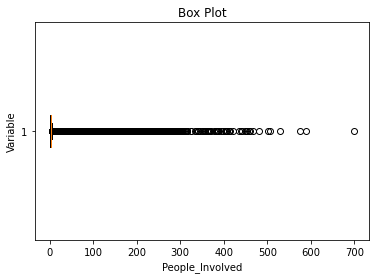

In [29]:
plt.boxplot(df_clean['People_Involved'], vert=False) 
plt.ylabel('Variable') 
plt.xlabel('People_Involved') 
plt.title('Box Plot') 
plt.show()

The boxplot reveals outliers in the number of people involved in the accidents. Understanding these outliers helps identify anomalies in the data, which can inform safety measures and aircraft selection.

In [30]:
# Final check of the cleaned dataframe
print(df_clean.info())
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73232 entries, 1 to 88888
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   73232 non-null  object 
 1   Type                 73232 non-null  object 
 2   Country              73232 non-null  object 
 3   Injury_Severity      73232 non-null  object 
 4   Damage_type          73232 non-null  object 
 5   Aircraft_Category    73232 non-null  object 
 6   Registration_Number  73232 non-null  object 
 7   Make                 73232 non-null  object 
 8   Model                73232 non-null  object 
 9   Engines              73232 non-null  float64
 10  Flight_Purpose       73232 non-null  object 
 11  Serious_Injuries     73232 non-null  float64
 12  Minor_Injuries       73232 non-null  float64
 13  Uninjured            73232 non-null  float64
 14  Weather_Condition    73232 non-null  object 
 15  Phase_of_Flight      73232 non-null 

In [31]:
df_clean.tail()

,ID,Type,Country,Injury_Severity,Damage_type,Aircraft_Category,Registration_Number,Make,Model,Engines,...,Report_Status,Year,Month,Day,City,State,Fatality,Total_Injuries,People_Involved,Enterprise_Type
88884,20221227106491,Accident,United States,Minor,Unknown,Unknown,N1867H,PIPER,PA-28-151,1.138622,...,Unknown,2022,12,26,Annapolis,MD,0,1.0,1.0,Unknown
88885,20221227106494,Accident,United States,Unknown,Unknown,Unknown,N2895Z,BELLANCA,7ECA,1.138622,...,Unknown,2022,12,26,Hampton,NH,0,0.0,0.0,Unknown
88886,20221227106497,Accident,United States,Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.000000,...,Unknown,2022,12,26,Payson,AZ,0,0.0,1.0,Commercial
88887,20221227106498,Accident,United States,Unknown,Unknown,Unknown,N210CU,CESSNA,210N,1.138622,...,Unknown,2022,12,26,Morgan,UT,0,0.0,0.0,Unknown
88888,20221230106513,Accident,United States,Minor,Unknown,Unknown,N9026P,PIPER,PA-24-260,1.138622,...,Unknown,2022,12,29,Athens,GA,0,1.0,2.0,Unknown


## Exploratory data analysis (EDA)

##### 1. Is there a trend in the number of accidents over years?

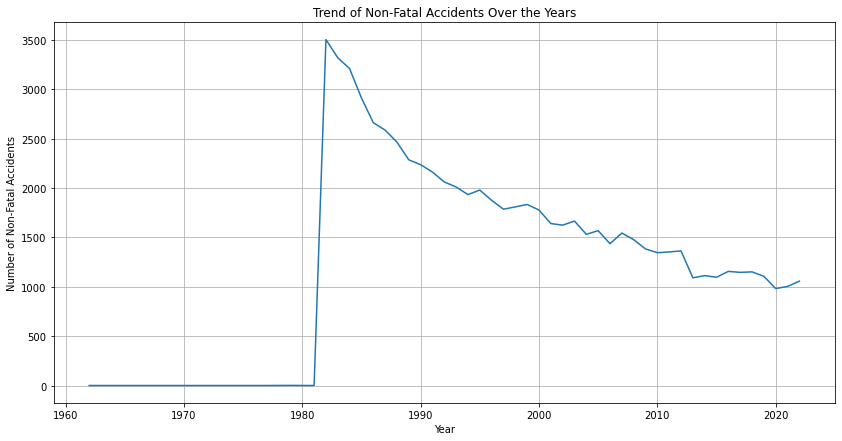

In [33]:
# Aggregating the number of non-fatal accidents per year
accidents_per_year = df_clean['Year'].value_counts().sort_index()

# Plotting the trend of non-fatal accidents over the years
plt.figure(figsize=(14, 7))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Trend of Non-Fatal Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Non-Fatal Accidents')
plt.grid(True)
plt.show()

#### Interpretation:
This line plot shows the number of accidents over the years. There is a noticeable peak around the early 1980s, followed by a general decline. This trend indicates improvements in aviation safety over time. 


##### 3. What extent of injuries are caused by these accidents?

In [ ]:
# Distribution of Injury Severity
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = 'Injury_Severity', data = df_clean, palette = 'Set2')
ax.set_title('Distribution of Injury Severity')
ax.set_xlabel('Severity')
ax.set_ylabel('Count');


#### Interpretation:
The distribution shows the majority of incidents from aircrafts with least accident count result in "Fatal" injuries, indicating that while accidents occur, they mostly do result in severe fatal injuries. 


#### What is the distribution of each aircraft type?

In [ ]:
# Creating new DataFrame of aircraft accidents that don't result in fatalities
df_non_fatal = df_clean[df_clean['Injury_Severity'] != 'Fatal']

In [ ]:
involved_aircrafts = df_non_fatal['Aircraft_Category'].value_counts().index

# Distribution of different aircraft types involved in accidents
plt.figure(figsize=(12, 6))
sns.countplot(data = df_non_fatal, y='Aircraft_Category', order = involved_aircrafts)
plt.title('Types of Aircrafts Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Type')
plt.show()

#### Interpretation:


##### What types of Damages do the Aircrafts that don't result in fatality cause?

In [ ]:
# Distribution of Aircraft Damage Types
plt.figure(figsize=(10, 6))
sns.countplot(y = 'Damage_type', data = df_clean, 
              order = df_clean['Damage_type'].value_counts().index, palette = 'mako')

plt.title('Distribution of Aircraft Damage Types')
plt.xlabel('Count')
plt.ylabel('Damage Type')
plt.show()


In [ ]:
# Distribution of Aircraft Damage Types
plt.figure(figsize=(10, 6))
sns.countplot(y = 'Damage_type', data = df_non_fatal, 
              order = df_non_fatal['Damage_type'].value_counts().index, palette = 'mako')

plt.title('Distribution of Aircraft Damage Types')
plt.xlabel('Count')
plt.ylabel('Damage Type')
plt.show()


#### Interpretation:
The plot demonstrates that "Minor" damage is the most prevalent type, followed by "Substantial" and "Destroyed" damages. 
By focusing on aircraft models with a track record of sustaining minor damages, we can reduce potential risks and ensuring overall safety. 

##### Which Aircraft Makes and Models were involved in the most accidents? 

In [ ]:
df_clean['Make'].value_counts().sum()

In [ ]:
make_counts_non_fatal = df_non_fatal['Make'].value_counts().nlargest(10)
model_counts_non_fatal = df_non_fatal['Model'].value_counts().nlargest(10)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plotting accident counts by aircraft make
sns.barplot(x = make_counts_non_fatal.values, y = make_counts_non_fatal.index, palette = 'viridis', ax = axes[0])
axes[0].set_title('Top 10 Aircraft Makes by Non-Fatal Accident Counts')
axes[0].set_xlabel('Accident Count')
axes[0].set_ylabel('Aircraft Make')

# Plotting accident counts by aircraft model
sns.barplot(x = model_counts_non_fatal.values, y = model_counts_non_fatal.index, palette = 'rocket', ax = axes[1])
axes[1].set_title('Top 10 Aircraft Models by Non-Fatal Accident Counts')
axes[1].set_xlabel('Accident Count')
axes[1].set_ylabel('Aircraft Model')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

##### What is the relationship between Flight Purpose and Injury Severity?

In [ ]:
plt.figure(figsize = (10, 7))
sns.countplot(y = 'Flight_Purpose', hue = 'Injury_Severity', data = df_non_fatal, palette = 'Set1')
plt.title('Injury Severity by Flight Purpose')
plt.xlabel('Count')
plt.ylabel('Flight Purpose')
plt.legend(title = 'Injury Severity')
plt.show()


#### Interpretation:
The plot reveals that personal flights have the highest count of minor and serious injuries, suggesting they may pose a higher risk compared to other flight purposes. By focusing on flight purposes with fewer and less severe injuries, the company can prioritize safer operational contexts for their new aviation venture. 

In [ ]:
plt.figure(figsize = (10, 7))
sns.countplot(y = 'Weather_Condition', hue = 'Injury_Severity', data = df_non_fatal, palette = 'Set1')
plt.title('Injury Severity by Flight Purpose')
plt.xlabel('Count')
plt.ylabel('Flight Purpose')
plt.legend(title = 'Injury Severity')
plt.show()


In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Weather_Condition', y='Total_Injuries', data=df_non_fatal)
plt.title('Weather Condition vs. Total Injuries for Non-Fatal Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()


#### Interpretation:
This visualization shows the distribution of damage types across the top 10 aircraft makes. It helps identify which aircraft makes are more prone to certain types of damage, aiding the company in selecting safer aircraft.


In [ ]:
# Relationship between injury severity and other variables
# The relationship between injury severity and weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df_non_fatal, x='Weather_Condition', hue='Injury_Severity')
plt.title('Injury Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(y='Flight_Purpose', hue='Weather_Condition', data=df_non_fatal, palette='coolwarm')
plt.title('Flight Purpose by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Flight Purpose')
plt.legend(title='Weather Condition')
plt.show()


##### Correlation Analysis

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df_clean.corr() # calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Insights and Interpretations
Distribution of Injury Severity: The distribution plot of injury severity will help identify how common fatal accidents are compared to non-fatal, minor, and serious injuries.
Distribution of Aircraft Makes: Understanding which aircraft makes are most common can help focus the analysis on the most frequently used aircraft and their associated risks.
Distribution of Flight Purposes: Analyzing the flight purposes can provide insights into which types of flights are more prone to accidents.
Injury Severity by Aircraft Make: This bivariate analysis will reveal which aircraft makes are associated with higher or lower injury severity.
Injury Severity by Flight Purpose: This will help understand which flight purposes have higher risks associated with severe injuries or fatalities.
Correlation Matrix: The heatmap will show correlations between numerical variables, helping to identify potential factors that correlate with higher fatalities or injuries.
Pairplot: This will provide a visual summary of relationships between multiple numerical variables, allowing for the identification of patterns or clusters.
Recommendations
Based on the visualizations and analysis, the following recommendations can be made:

Prioritize Aircraft with Lower Fatality Rates: Focus on aircraft makes and models that show lower fatality rates in the injury severity analysis.
Evaluate Flight Purposes: Consider the purpose of flights when purchasing aircraft. Certain flight purposes might be associated with higher risks.
Detailed Analysis of High-Risk Aircraft Makes: Conduct a deeper investigation into aircraft makes that are associated with higher injury severities to understand the underlying causes.
Risk Mitigation Strategies: Develop strategies to mitigate risks for flight purposes that are associated with higher injury severities.
Continuous Monitoring: Implement a system for continuous monitoring and analysis of aviation accident data to make data-driven decisions for fleet management and safety improvements.

In [ ]:
a

Saving the clean preprocessed dataframe so as to use it in Tableau to create an interactive dashboard

In [ ]:
df_clean.to_csv('preprocessed_aviation_data.csv', index=False)